# Optimization in Logistic Regression

Comparison of logistic regression algorithms regularized vs. non-regularized and full vs. mini batch optimization. We use Numpy, Scikit learn and built-in Python functions.We are working with the UCI ML Breast Cancer Wisconsin (Diagnostic) dataset https://goo.gl/U2Uwz2.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. There are 212 malignant examples and 357 benign examples.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

## Load and preprocess the data 

In [34]:
X, y = load_breast_cancer(return_X_y=True)
X = np.hstack([np.ones([X.shape[0], 1]), X]) # By adding a vector of ones, we absorb the bias term
np.random.seed(0) # Random seed
test_size = 0.3 # Split the data into train and test 70 / 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

## The sigmoid function 

In [35]:
def sigmoid(t):
    
    sigmoid_t = 1 / (1 + (np.exp(-t)))
    
    return sigmoid_t

## The negative log likelihood (NLL)

In [36]:
def negative_log_likelihood(X, y, w):

    sig = sigmoid(X.dot(w))
    
    return -1*(y.T.dot(np.log(sig)) + (1-y).T.dot(np.log(1-sig)))

## The gradient of the NLL w.r.t w
Calculates the gradient (full or mini-batch) of the negative log likelilhood with respect to the weights w. <br />
<b>Parameters:</b><br />
<i>X </i>: array, shape [N, D] (Augmented feature matrix) <br />
<i>y </i>: array, shape [N] (Classification targets)<br />
<i>w </i>: array, shape [D] (Regression coefficients (w[0] is the bias term).)<br />
<i>mini_batch_indices</i>: array, shape [mini_batch_size] (The indices of the data points to be included in the (stochastic) calculation of the gradient.)<br />
<i>lmbda</i>: float (Regularization strength. lmbda = 0 means having no regularization.)<br /> 
<b>Returns:</b><br />
<i>dw</i>: float, shape [D] (Gradient with respect to the weights)

In [38]:
def get_gradient(X, y, w, mini_batch_indices, lmbda):

    x_mini_batch = X[mini_batch_indices,:]
    y_mini_batch = y[mini_batch_indices]
    
    return x_mini_batch.T.dot(sigmoid(x_mini_batch.dot(w))-y_mini_batch) + 2*lmbda*w

## Perfoming logistic regression

<b>Parameters:</b><br />
<i>X </i>: array, shape [N, D] (Augmented feature matrix) <br />
<i>y </i>: array, shape [N] (Classification targets)<br />
<i>num_steps </i>: int (Number of steps of gradient descent to perform)<br />
<i>learning_rate</i>: float (The learning rate to use when updating the weights)<br />
<i>mini_batch_size</i>: float (The number of examples in each mini-batch. If mini_batch_size=n_train we perform full batch gradient descent.)<br /> 
<i>lmbda</i>: float (Regularization strength. lmbda = 0 means having no regularization.)<br /> 

<b>Returns:</b><br />
<i>w</i>: float, shape [D] (Optimal regression coefficients (w[0] is the bias term).)<br /> 
<i>trace</i>: list (Trace of the negative log likelihood after each step of gradient descent.)

In [39]:
def logistic_regression(X, y, num_steps, learning_rate, mini_batch_size, lmbda):

    trace = [] # saves the value of the log likelihood at each step to be able to plot it later
    n_train = X.shape[0] # number of training instances
    w = np.zeros(X.shape[1]) # initialize the parameters to zeros
    
    # run gradient descent for a given number of steps
    for step in range(num_steps):
        
        permuted_idx = np.random.permutation(n_train) # shuffle the data
        
        # go over each mini-batch and update the paramters
        for idx in range(0, n_train, mini_batch_size):
            
            # get the random indices to be included in the mini batch
            mini_batch_indices = permuted_idx[idx:idx+mini_batch_size]
            
            gradient = get_gradient(X, y, w, mini_batch_indices, lmbda)

            # update the parameters
            w = w - learning_rate * gradient

            # calculate and save the negative log likelihood
            nnl = negative_log_likelihood(X, y, w)
            trace.append(nnl)
        
        # print the negative log likelihood every 10th iteration to monitor the progress
        #if step % 10 == 0:
            #print(nnl)
        
    return w, trace

## The function to obtain predictions
<b>Parameters:</b><br />
<i>X</i>: array, shape [N_test, D] (Augmented feature matrix) <br />
<i>w</i>: array, shape [D] (Regression weights (w[0] is the bias term).) <br />

<b>Returns:</b><br />
<i>y_pred</i> : array, shape [N_test] (A binary array of predictions.) <br />

In [40]:
def predict(X, w):
    
    y_pred = sigmoid(X.dot(w))>0.5
    
    return y_pred

# Full batch gradient descent without regularization
$$Regularization = 0$$
$$Batch = Full $$

In [41]:
n_train = X_train.shape[0]
w, trace = logistic_regression(X_train, y_train, num_steps=8000, learning_rate=1e-8, mini_batch_size=n_train, lmbda=0.0)

accuracy: 0.94, f1_score: 0.95


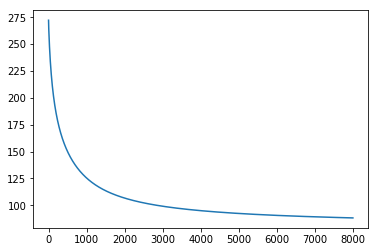

In [42]:
plt.plot(trace)
y_pred = predict(X_test, w)
print('accuracy: {:.2f}, f1_score: {:.2f}'.format(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)))

# Full batch gradient descent with regularization
$$Regularization = 0.001$$
$$Batch = Full $$

In [43]:
w, trace = logistic_regression(X_train, y_train, num_steps=8000, learning_rate=1e-8, mini_batch_size=n_train, lmbda=1e-3)

accuracy: 0.94, f1_score: 0.95


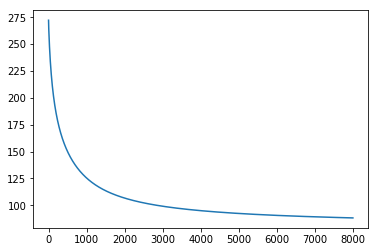

In [44]:
plt.plot(trace)
y_pred = predict(X_test, w)

print('accuracy: {:.2f}, f1_score: {:.2f}'.format(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)))

# Mini-batch gradient descent without regularization
$$Regularization = 0$$
$$Batch = 10 $$

In [48]:
w, trace = logistic_regression(X_train, y_train, num_steps=2000, learning_rate=1e-8, mini_batch_size=10, lmbda=0)

accuracy: 0.92, f1_score: 0.94


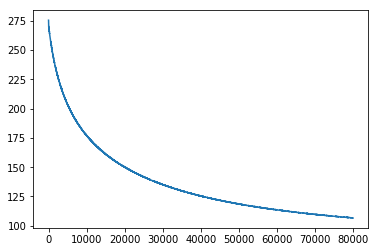

In [49]:
plt.plot(trace)
y_pred = predict(X_test, w)

print('accuracy: {:.2f}, f1_score: {:.2f}'.format(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)))

# Mini-batch gradient descent with regularization
$$Regularization = 0.001$$
$$Batch = 10 $$

In [50]:
w, trace = logistic_regression(X_train, y_train, num_steps=2000, learning_rate=1e-8, mini_batch_size=10, lmbda=1e-3)

accuracy: 0.92, f1_score: 0.94


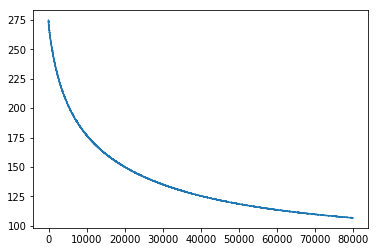

In [51]:
plt.plot(trace)
y_pred = predict(X_test, w)

print('accuracy: {:.2f}, f1_score: {:.2f}'.format(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)))